# tests for merging traces from parallel runs

## Test plotting the TT curves using the pickle stacked traces

Radii: [    0.    -28.  -1272.  -1298.  -1313.  -1323.  -1737.1]


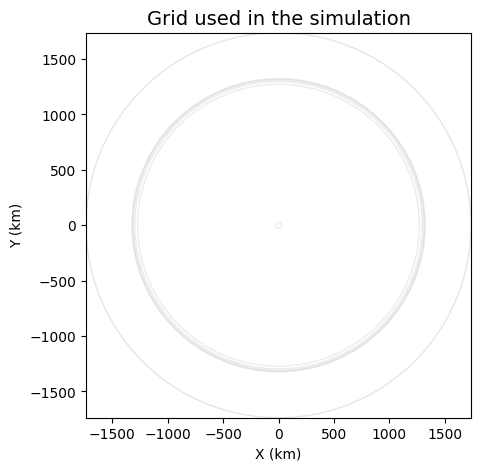

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def plot_earth_layers(grid,ax,colormap,Radius_km,**kwargs):
    """
    Plots the radial layers of the Earth model in a planar XY view.

    Parameters:
        grid (ndarray): The Earth model grid with shape (1, 1, n_layers, 3),
                        where each layer is defined as [x, y, z].
        colormap (ndarray): An optional Nx3 matrix to color the layers.
    """
    # Extract the radial coordinates (z-values)
    radii = grid[0, 0, :, 2]
    print(f"Radii: {radii}")
    # Prepare the plot
    ax.set_aspect('equal')
    ax.set_xlim([-Radius_km, Radius_km])
    ax.set_ylim([-Radius_km, Radius_km])

    # Plot each layer as a circle
    for i, radius in enumerate(radii):
        # Define the color if colormap is provided
        if colormap is not None and i < len(colormap):
            color = colormap[i]
        else:
            color = 'r'  # Default color

        circle = plt.Circle((0, 0), radius, edgecolor='black', facecolor='white', alpha=0.1,lw=1,**kwargs)
        ax.add_artist(circle)

    # Label the plot
    ax.set_title("Grid used in the simulation", fontsize=14)
    ax.set_xlabel("X (km)")
    ax.set_ylabel("Y (km)")
    
def read_gridgeom(gridfile):
    # Load the raw grid data from the file
    GG_Raw = np.loadtxt(gridfile, skiprows=8)

    # Initialize base index (assuming it is 0, as in the original code)
    ibase = 0

    # Extract grid dimensions (NX, NY, NZ) based on the maximum values in each coordinate
    NX = int(np.max(GG_Raw[:, 0]) - ibase + 1)
    NY = int(np.max(GG_Raw[:, 1]) - ibase + 1)
    NZ = int(np.max(GG_Raw[:, 2]) - ibase + 1)
    # Initialize the GG matrix (shape: NX x NY x NZ x 3)
    GG = np.zeros((NX, NY, NZ, 3))

    # Loop through each line of the raw grid and pack the values into the GG matrix
    for j in range(GG_Raw.shape[0]):
        ix = int(GG_Raw[j, 0] - ibase)
        iy = int(GG_Raw[j, 1] - ibase)
        iz = int(GG_Raw[j, 2] - ibase)
        
        # Assign the X, Y, Z coordinates to the GG matrix
        GG[ix, iy, iz, 0] = GG_Raw[j, 3]  # X
        GG[ix, iy, iz, 1] = GG_Raw[j, 4]  # Y
        GG[ix, iy, iz, 2] = GG_Raw[j, 5]  # Z

    return GG
file = '/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250618-153159-spherical-moon-R3D-M2-A01/process_0/griddump.txt'
GG=read_gridgeom(file)
# Optionally, define a colormap (example colors for each layer)
colormap = None
fig,ax=plt.subplots(1,1,figsize=(10,5))
R_moon = 1737.4  # Radius of the Moon in km
plot_earth_layers(GG,ax,Radius_km=R_moon,colormap=colormap, zorder=1)

### Test for the new data saving format

In [ ]:
import os
import numpy as np
from obspy import Stream, Trace, UTCDateTime
from obspy import read, Stream
import pickle

trace_dir = '/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250620-125936-spherical-moon/seisfiles/'
for trace in os.listdir(os.path.dirname(trace_dir)):
    print(f"Found trace: {trace}")
    if trace.endswith('asc.dat'):
        print(f"Processing trace: {trace}")
        trace_path = os.path.join(os.path.dirname(trace_dir), trace)
        # Read the trace and convert to ObsPy Stream
        st=dat_to_pickle(trace_path)

Found trace: seis_004.pkl
Found trace: seis_005.pkl
Found trace: seis_000_asc.dat
Processing trace: seis_000_asc.dat
RTZ
Found trace: seis_007.pkl
Found trace: seis_006.pkl
Found trace: seis_001_asc.dat
Processing trace: seis_001_asc.dat
RTZ
Found trace: seis_002.pkl
Found trace: seis_003.pkl
Found trace: seis_001.pkl
Found trace: seis_000.pkl
Found trace: seis_003_asc.dat
Processing trace: seis_003_asc.dat
RTZ
Found trace: seis_002_asc.dat
Processing trace: seis_002_asc.dat
RTZ
Found trace: seis_007_asc.dat
Processing trace: seis_007_asc.dat
RTZ
Found trace: seis_006_asc.dat
Processing trace: seis_006_asc.dat
RTZ
Found trace: seis_004_asc.dat
Processing trace: seis_004_asc.dat
RTZ
Found trace: seis_005_asc.dat
Processing trace: seis_005_asc.dat
RTZ


In [80]:
read('/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250620-125936-spherical-moon/seisfiles/seis_007.pkl')

7 Trace(s) in Stream:
R3D.007..ER | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..ET | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..EZ | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..EP | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..ES | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..CP | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples
R3D.007..CS | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:59:59.500000Z | 2.0 Hz, 7200 samples

In [ ]:
from obspy import read, Stream
import os
import numpy as np

def merge_traces(Directory, SeisName, NCore):
    """
    Directory : Base directory of the batch simulation
    SeisName : Name of the seismic MSEED file (e.g., 'seis_0.mseed')
    NCore : Number of cores in the simulation
    """
    print(f"Starting merge for {Directory}/{SeisName} over {NCore} processes.")

    merged_stream = None
    total_phonons = 0

    for Core in range(NCore):
        seis_path = f"{Directory}/process_{Core}/seisfiles/{SeisName}"
        if not os.path.exists(seis_path):
            continue
        
        print(f"Reading seismic file: {seis_path}")
        st = read(seis_path)
        print(st[0].stats)  # Print stats of the first trace for debugging
        # Initialize with first stream
        if merged_stream is None:
            merged_stream = st.copy()
            # Initialize phonon count
            total_phonons += int(st[0].stats.NumPhonon)
        else:
            # Add data from each trace
            for tr_new in st:
                tr_existing = merged_stream.select(channel=tr_new.stats.channel)[0]
                tr_existing.data += tr_new.data
            # Update phonon count
            total_phonons += int(st[0].stats.NumPhonon)

        # Optionally remove individual file after merging
        os.remove(seis_path)
        print(f"Merged and removed {seis_path}")

    if merged_stream is None:
        print("No traces found to merge.")
        return 1

    # Update phonon count metadata in all traces
    for tr in merged_stream:
        tr.stats.NumPhonon = total_phonons

    # Write final merged MSEED
    output_dir = f"{Directory}/seisfiles"
    os.makedirs(output_dir, exist_ok=True)
    merged_stream.write(f"{output_dir}/{SeisName}", format="MSEED")

    print(f"Finished merging {SeisName}. Saved to {output_dir}/{SeisName}")
    return 0

directory = '/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01'
ncore =2
for i in range(0,8):
    seisname = f'seis_{i:03d}.pkl'  # Name of the seismic MSEED file to merge
    print(f"Merging traces for {seisname} in {directory}")


    merge_traces(Directory=directory, SeisName=seisname, NCore=ncore)

Merging traces for seis_000.pkl in /Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01
Starting merge for /Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01/seis_000.pkl over 2 processes.
No traces found to merge.
Merging traces for seis_001.pkl in /Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01
Starting merge for /Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01/seis_001.pkl over 2 processes.
Reading seismic file: /Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250619-115101-spherical-moon-R3D-M2-A01/process_0/seisfiles/seis_001.pkl
         network: R3D
         station: 001
        location: 
         channel: EX
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:59

[np.float64(917.0), np.float64(925.0), np.float64(944.0), np.float64(973.0), np.float64(1011.0), np.float64(1058.0), np.float64(1112.0), np.float64(1173.0), np.float64(1239.0), np.float64(1309.0), np.float64(1384.0), np.float64(1461.0), np.float64(1542.0), np.float64(1625.0), np.float64(1710.0), np.float64(1796.0), np.float64(1884.0), np.float64(1974.0), np.float64(2064.0), np.float64(2156.0), np.float64(2248.0), np.float64(2341.0), np.float64(2435.0), np.float64(2530.0), np.float64(2625.0), np.float64(2720.0), np.float64(2816.0), np.float64(2912.0), np.float64(3009.0), np.float64(3106.0), np.float64(3203.0), np.float64(3301.0), np.float64(3398.0), np.float64(3496.0), np.float64(3594.0), np.float64(3693.0), np.float64(3791.0), np.float64(3890.0), np.float64(3989.0), np.float64(4088.0), np.float64(4187.0), np.float64(4286.0), np.float64(4386.0), np.float64(4485.0), np.float64(4584.0), np.float64(4684.0), np.float64(4784.0), np.float64(4884.0), np.float64(4983.0), np.float64(5083.0)]
X0:

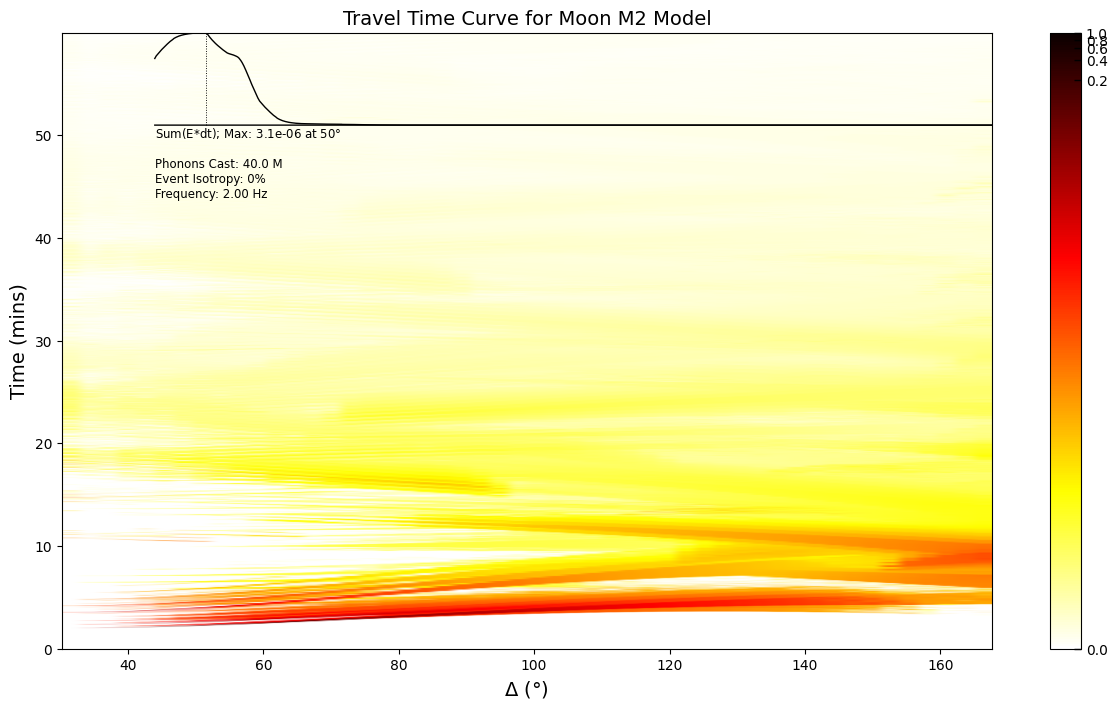

In [ ]:

# Assemble the array from the seismic files
fpath = '/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250623-132918-spherical-moon-R3D-M2-ttcurve-A01/seisfiles'
ibegin = 0
iend = 499
fsignature = 'pkl'  # Change to 'asc.dat' if using ASCII
array_dict = assembleArray(fpath, ibegin, iend)



basedir= '/Users/balthazar/Downloads/Radiative3d-spherical-shells'
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plot_ttcurve(basedir,array_dict, ax, 0, "Travel Time Curve for Moon M2 Model", gamma=0.05, theoretical=False, R=1737.4)

In [ ]:
from Python.Radiative_python_funcs import *
current_path = os.getcwd()
def assembleArray(fpath, ibegin, iend):
    array = {
        'NumSeismometer': 0,
        'Distances': [],
        'Azimuths': [],
        'EnergyXYZ': []
    }

    for i in range(ibegin, iend+1):
        filename = f"{fpath}/seis_{i:03d}.pkl"
        if not os.path.exists(filename):
            continue

        with open(filename, 'rb') as f:
            st = pickle.load(f)

        # Get distances & azimuth
        tr0 = st[0]  # one trace for metadata
        seisloc = tr0.stats.SeisLocation
        eventloc = tr0.stats.EventLocation
        IsoPercentage = tr0.stats.IsoPercentage
        array['IsoPercentage'] = IsoPercentage
        range_km,azimuth = get_azi_range_km_from_coords(seisloc, eventloc)
        array['NumSeismometer'] += 1


        # Sum EnergyXYZ components
        ex = st.select(channel="ER")[0].data
        ey = st.select(channel="ET")[0].data
        ez = st.select(channel="EZ")[0].data
        total_energy_xyz = ex + ey + ez
        range_km = np.round(range_km, 0)  # Here I round the range so that values from different seismometers can be merged. This is important !
        if range_km in array['Distances']: # Check if the distance is already in the array

            # If the distance is already in the array, add the energy to the existing seismometer
            # Find the index of the duplicate distance
        
            idx = array['Distances'].index(range_km)
            # Add the energy to the existing seismometer
            array['EnergyXYZ'][idx] += total_energy_xyz
        else:
            # Add the new distance and energy
            array['Distances'].append(range_km)
            array['EnergyXYZ'].append(total_energy_xyz)
            array['Azimuths'].append(azimuth)
            # Add the energy to the existing seismometer

        if i == ibegin:
            array['TimeAxis'] = np.arange(len(ex)) * (1.0 / st[0].stats.sampling_rate)
            array['NumBin'] = len(ex)
            array['Frequency'] = tr0.stats.Frequency
            array['EventMT'] = tr0.stats.MomentTensor
            array['TOA_degree'] = tr0.stats.TOA_Degree
            array['NumPhonon'] = tr0.stats.NumPhonon
            array['TimeToLive'] = tr0.stats.TimeToLive
            array['BinSize'] = 1.0 / st[0].stats.sampling_rate
            array['MaxTime'] = array['TimeAxis'][-1]

    return array

ibegin = 0 # Start index for the array
iend = 9 # End index for the array
array_dict = assembleArray("/Users/balthazar/Downloads/Radiative3d-spherical-shells/data/Parallel-runs/20250623-194149-spherical-moon-R3D-parallel-ttcurve-A01/seisfiles", ibegin, iend)
print(array_dict['BinSize'])

0.5
